In [1]:
from keras.datasets import imdb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
(train_data, train_labels), (test_data, test_labels) = \
imdb.load_data(num_words = 10000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
# the function creates an all zero-matrix of shape (len(sequences), dimension)

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


#Vectorizing train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_dim=10000)) 
model.add(layers.Dense(16, activation='tanh')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [10]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:] 

y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=3, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 57ms/step - loss: 0.1956 - accuracy: 0.7027 - val_loss: 0.1118 - val_accuracy: 0.8723
Epoch 2/3
30/30 [==============================] - 0s 16ms/step - loss: 0.0882 - accuracy: 0.9038 - val_loss: 0.0875 - val_accuracy: 0.8886
Epoch 3/3
30/30 [==============================] - 0s 15ms/step - loss: 0.0549 - accuracy: 0.9428 - val_loss: 0.0829 - val_accuracy: 0.8871


In [12]:
history_dict = history.history

In [13]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
history_dict

{'loss': [0.16082926094532013, 0.08331901580095291, 0.05673062428832054],
 'accuracy': [0.7916666865348816, 0.9064666628837585, 0.9361333250999451],
 'val_loss': [0.1117841899394989, 0.08748911321163177, 0.08288578689098358],
 'val_accuracy': [0.8723000288009644, 0.8885999917984009, 0.8870999813079834]}

In [15]:
import matplotlib.pyplot as plt

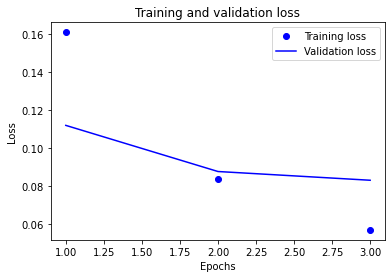

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

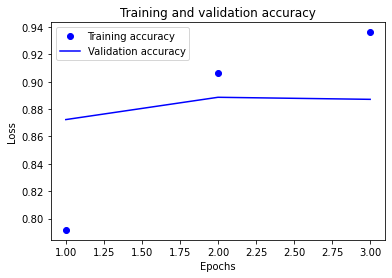

In [17]:
plt.clf()

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_dim = 10000))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3, batch_size = 512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
49/49 [==============================] - 2s 23ms/step - loss: 0.1770 - accuracy: 0.7429
Epoch 2/3
49/49 [==============================] - 0s 10ms/step - loss: 0.0718 - accuracy: 0.9163
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0877 - accuracy: 0.8805


[0.08767017722129822, 0.8804799914360046]

In [19]:
model.predict(x_test)

array([[0.10562766],
       [0.9967475 ],
       [0.9360984 ],
       ...,
       [0.09372726],
       [0.05797109],
       [0.5555304 ]], dtype=float32)